# VaR - Value at Risk

There are 3 methods to compute VaR:
- Historical Simulation
- Variance-Covariance VaR
- Monte Carlo Simulation

Here we'll use method Historical Simulation

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [2]:
# Get data from Yahoo Finance for CW8 ETF
dat = yf.Ticker("CW8.PA")
dat.info['longName']

'Amundi Index Solutions - Amundi MSCI World UCITS ETF C EUR'

In [3]:
# Set the data period to max, put result into a DataFrame (df) and print the end of the DataFrame:
df = dat.history(period='max')
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2025-07-21 00:00:00+02:00,559.719299,560.335815,558.000000,558.890198,5263,0.0,0.0,0.0
2025-07-22 00:00:00+02:00,557.148193,557.913574,554.500122,555.143005,8017,0.0,0.0,0.0
2025-07-23 00:00:00+02:00,558.508789,560.499817,558.299988,559.756226,3620,0.0,0.0,0.0
2025-07-24 00:00:00+02:00,561.337585,562.255798,559.750000,560.994812,9183,0.0,0.0,0.0
2025-07-25 00:00:00+02:00,560.958618,562.446716,560.082275,562.080872,3923,0.0,0.0,0.0


In [4]:
# Create column Yield
# Use function pct_change that computes the fractional change between current and previous element to do it
df['Yield'] = df['Close'].pct_change().dropna()
# To computer VaR we need to sort Yield value
df_sorted = df.sort_values(by='Yield')
df_sorted

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,Yield
Date,,,,,,,,,
2020-03-12 00:00:00+01:00,248.999802,250.500000,235.500000,238.630005,27730,0.0,0.0,0.0,-0.082651
2020-03-09 00:00:00+01:00,263.179993,267.798004,256.000000,263.010315,15872,0.0,0.0,0.0,-0.062524
2015-08-24 00:00:00+02:00,187.429596,187.429596,187.429596,187.429596,0,0.0,0.0,0.0,-0.058994
2020-03-23 00:00:00+01:00,221.649994,233.468094,218.071503,222.020401,15473,0.0,0.0,0.0,-0.056236
2011-08-08 00:00:00+02:00,100.519997,100.519997,100.519997,100.519997,0,0.0,0.0,0.0,-0.050892
...,...,...,...,...,...,...,...,...,...
2015-08-27 00:00:00+02:00,200.913696,200.913696,200.913696,200.913696,0,0.0,0.0,0.0,0.038356
2025-04-10 00:00:00+02:00,510.766205,511.797607,484.892395,484.892395,27284,0.0,0.0,0.0,0.039577
2020-04-06 00:00:00+02:00,254.009995,256.290588,252.212997,255.490005,15751,0.0,0.0,0.0,0.040814


In [5]:
# Display the VaR:
print('Var 95% is : '+ (np.percentile(df_sorted['Yield'].dropna(), 5)*100).round(2).astype(str) + '%')

Var 95% is : -1.44%


This means there is a probability of 5% (1 - 95%) to lose more than -1.44% per day.
Meaning 95% of the time the loss will be inferior to -1.44%.

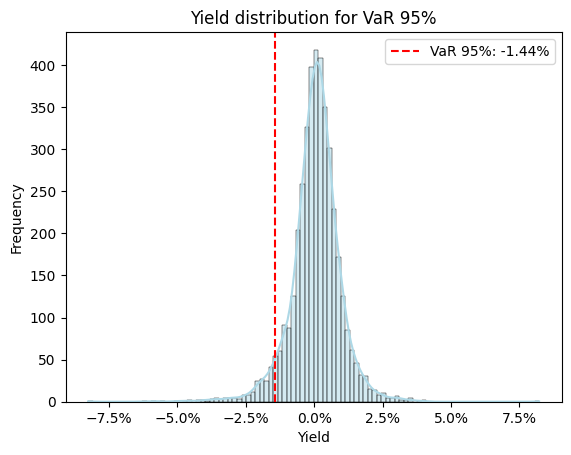

In [6]:
# Create graph
sns.histplot(df_sorted['Yield'], bins=100, kde=True, color='lightblue')
var_95 = np.percentile(df_sorted['Yield'].dropna(), 5)
plt.axvline(var_95, color='red', linestyle='--', label=f'VaR 95%: {var_95:.2%}')
plt.legend()
plt.title("Yield distribution for VaR 95%")
plt.xlabel("Yield")
plt.ylabel("Frequency")
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.show()

Now let's create one function to do all the work for us in one call.

VaR for: Amundi Index Solutions - Amundi MSCI World UCITS ETF C EUR
Var 95% is : -1.44%
This means there is a probability of 5% (100 - 95%) to lose more than -1.44% per day
Meaning 95% of the time the loss will be inferior to -1.44%


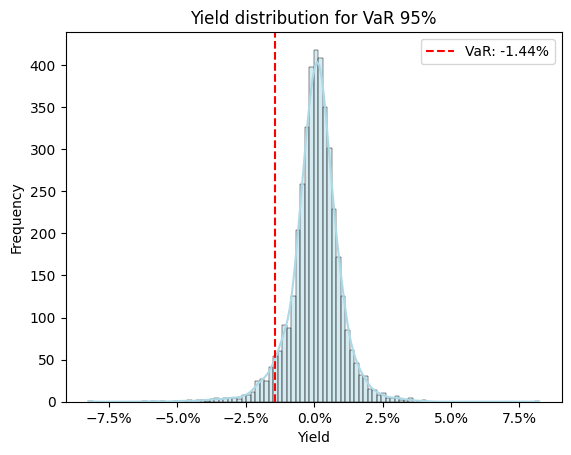

In [7]:
from finance_compute_helper import show_var_report
show_var_report("CW8.PA", 95)

VaR for: NVIDIA Corporation
Var 99% is : -9.36%
This means there is a probability of 1% (100 - 99%) to lose more than -9.36% per day
Meaning 99% of the time the loss will be inferior to -9.36%


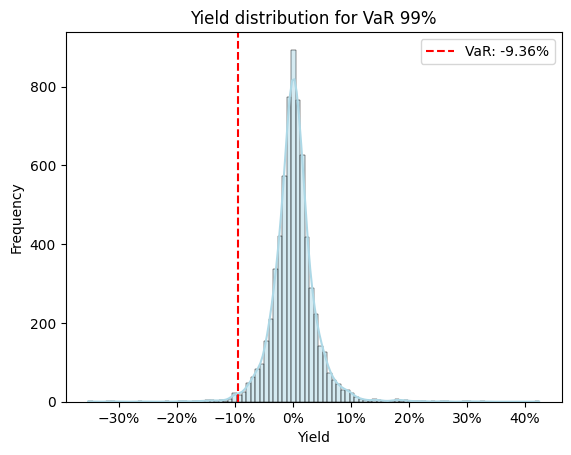

In [8]:
show_var_report("NVDA", 99)